# Alternative metrics for binary classifiers

Accuracy seems like a sensible metric to evaluate (and to a certain extent it is), but you need to be careful about drawing too many conclusions from the accuracy of a classifier. Remember that it's simply a measure of how many cases were predicted correctly. Suppose only 3% of the population is diabetic. You could create a classifier that always just predicts 0, and it would be 97% accurate - but not terribly helpful in identifying patients with diabetes!

Fortunately, there are some other metrics that reveal a little more about how our model is performing. Scikit-Learn includes the ability to create a classification report that provides more insight than raw accuracy alone.

To get started, run the next cell to load our data and train our model like last time

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# load the training dataset

!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv

diabetes = pd.read_csv('diabetes.csv')

# separate features and labels

# select all column names but the first and last. first is patient ID, last is the label
features  = list(diabetes.columns)[1:-1]

label = diabetes.columns[-1]

X , y  = diabetes[features].values, diabetes[label].values

# split data 0.7-0.3 into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# train the logistic regression model

from sklearn.linear_model import LogisticRegression
reg = 0.01 #regularization rate
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train,y_train)

# predict labels for test set

predictions =  model.predict(X_test)




print('Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
print('Precision: ', precision_score(y_test, model.predict(X_test)))
print('Recall: ', recall_score(y_test, model.predict(X_test)))
print('F1: ', f1_score(y_test, model.predict(X_test)))
print('AUC: ', roc_auc_score(y_test, model.predict(X_test)))



'wget' is not recognized as an internal or external command,
operable program or batch file.


Accuracy:  0.7893333333333333
Precision:  0.7242472266244057
Recall:  0.6036988110964333
F1:  0.6585014409221902
AUC:  0.7435774698482835


One of the simplest places to start is a classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [3]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, ))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



These metrics come from a confusion matrix, which is a table that shows the number of correct and incorrect predictions made by the classification model compared to the actual outcomes (target value) in the data.


The confusion matrix is built with the following components: 

* True positive: When the predicted and actual label are both 1. (2,2)
* False positive: When the predicted label is 1 and the actual label is 0. (1,2)
* True negative: When the predicted and actual label are both 0. (1,1)
* False negative: When the predicted label is 0 and the actual label is 1. (2,1)


In [4]:
from sklearn.metrics import confusion_matrix

# print the confusion matrix

confusionMatrix  = confusion_matrix(y_test, predictions)
confusionMatrix[0,0]
confusionMatrix

array([[2638,  348],
       [ 600,  914]], dtype=int64)

What actually gets predicted by a binary classifier is the probability that the label is true **P(Y)** and the probability the label is false 1-**P(Y)**. The classifier then makes a decision based on a threshold. If the probability is greater than the threshold, the label is predicted to be true, otherwise it is predicted to be false. The threshold is usually set to 0.5, but it can be changed to adjust the classifier's behavior.

We can use the **predict_proba**  to see the probability pairs for each case:

In [5]:
y_scores = model.predict_proba(X_test)
y_scores

array([[0.81657116, 0.18342884],
       [0.9630332 , 0.0369668 ],
       [0.80872619, 0.19127381],
       ...,
       [0.60692458, 0.39307542],
       [0.10656641, 0.89343359],
       [0.63859127, 0.36140873]])

A common way to evaluate a cclassifier is to examine the true positive rate (TPR) (recall) and the false positive rate (FPR) for a range of possible thresholds to form a chart known as received operator characteristic (ROC) chart like this:

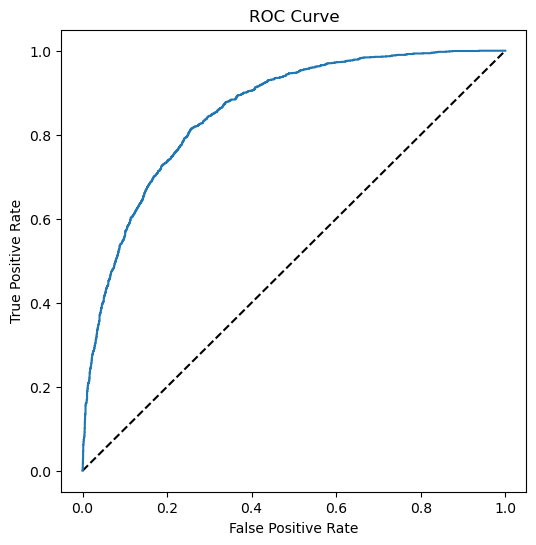

In [10]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1] )

# plot roc curve

fig = plt.figure(figsize=(6,6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The ROC chart shows the performance of a classification model at all classification thresholds. Specifically, the ROC chart plots the false positive rate (FPR) on the X-axis and the true positive rate (TPR) on the Y-axis. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.

The area under the curve (AUC) is a valie between 0 and 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. In general, a model whose predictions are no better than random has an AUC of 0.5.

In [12]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC: %.3f' % auc)

AUC: 0.857


# perform preprocessing in a pipeline   

 